In [23]:
import networkx as nx
%matplotlib inline

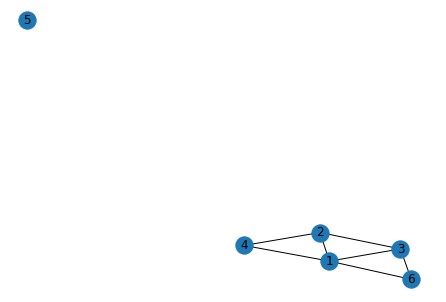

In [24]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('1')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['2', '3', '4','5','6']
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('1', '2')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('1', '3'),('1','4'),('1','6'),
                ('2', '3'),('2','4'),
                ('3', '6')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)


<BarContainer object of 5 artists>

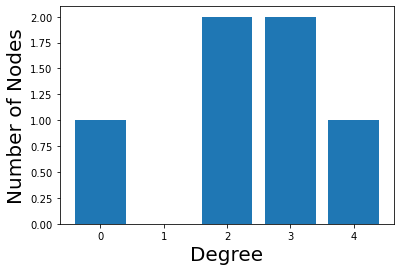

In [25]:
from collections import Counter
import matplotlib.pyplot as plt
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)
# Adjacency Matrix representation in Python


In [26]:
# Class representing a simple graph using an edge list
class Graph:
    # Basic constructor method
    def __init__(self, edge_list, num_of_nodes):
        # Convert edge list to adjacency list,
        # represented with a multi-dimensional array
        self.adjacency_list = [[] for _ in range(num_of_nodes)]

        # Add edges to corresponding nodes of the graph
        for (origin, dest) in edge_list:
            self.adjacency_list[origin].append(dest)


# Helper method to print adjacency list representation
def print_graph(graph):
    for origin in range(len(graph.adjacency_list)):
        # print current vertex and all its neighboring vertices
        for dest in graph.adjacency_list[origin]:
            print(f"{origin} —> {dest} ", end="")
        print()


if __name__ == "__main__":
    # Set up an edge list and number of nodes
    edge_list = [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
    num_of_nodes = 6

    graph = Graph(edge_list, num_of_nodes)
    print_graph(graph)
    



1 —> 2 1 —> 3 1 —> 4 1 —> 6 
2 —> 3 2 —> 4 
3 —> 6 




In [27]:
# Graph via adjacency list
graph = {
    "1": ["2", "3", "4","6"],
    "2": ["1", "3", "4"],
    "3": ["1", "2", "6"],
    "4": ["1", "2"],
    "5": [],
    "6": ["1", "3"],
}

keys = sorted(graph.keys())
size = len(keys)

matrix = [[0] * size for i in range(size)]

# We iterate over the key:value entries in the dictionary first,
# then we iterate over the elements within the value
for a, b in [(keys.index(a), keys.index(b)) for a, row in graph.items() for b in row]:
    # Use 1 to represent if there's an edge
    # Use 2 to represent when node meets itself in the matrix (A -> A)
    matrix[a][b] = 2 if (a == b) else 1

print(matrix)

[[0, 1, 1, 1, 0, 1], [1, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0]]
